In [ ]:
%matplotlib inline


# Mouse move and click events

An example of how to interact with the plotting canvas by connecting to move
and click events.

<div class="alert alert-info"><h4>Note</h4><p>This example exercises the interactive capabilities of Matplotlib, and this
    will not appear in the static documentation. Please run this code on your
    machine to see the interactivity.

    You can copy and paste individual parts, or download the entire example
    using the link at the bottom of the page.</p></div>


<IPython.core.display.Javascript object>


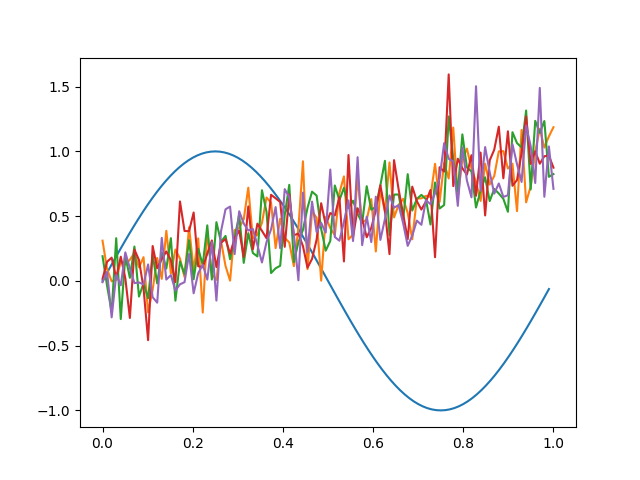

In [12]:
%matplotlib notebook
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np
import numpy.random

plt.ion()

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)

def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    x = np.linspace(0, 1, 100)
    noise = numpy.random.normal(0, 0.2, len(x))
    y = x + noise
    ax.plot(x, y)
    fig.canvas.draw()

binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from matplotlib.figure import Figure

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)

fig: Figure = plt.figure()
axes = fig.subplots(1, 2)
params_axes: Axes = axes[0]
plot_axes: Axes = axes[1]

params_axes.set_xlim(-1, 1)
params_axes.set_ylim(-1, 1)
plot_axes.set_xlim(-1, 1)
plot_axes.set_ylim(-1, 1)


def on_move(event):
    if event.inaxes == params_axes:
        plot_axes.clear()
        x = np.linspace(0, 1, 50)
        y = x * event.xdata + event.ydata
        plot_axes.plot(x, y)
        plot_axes.set_xlim(0, 1)
        plot_axes.set_ylim(0, 1)
        fig.canvas.draw()


# def on_click(event):
#     x = np.linspace(0, 1, 100)
#     noise = numpy.random.normal(0, 0.2, len(x))
#     y = x + noise
#     ax.plot(x, y)
#     fig.canvas.draw()

fig.canvas.mpl_connect('motion_notify_event', on_move)

# binding_id = plt.connect('motion_notify_event', on_move)
# plt.connect('button_press_event', on_click)

plt.show()
